In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import ADASYN
import numpy as np

path_train = '/content/drive/MyDrive/Data/train_data.csv'
train_df = pd.read_csv(path_train)

path_val = '/content/drive/MyDrive/Data/val_data.csv'
val_df = pd.read_csv(path_val)

path_test = '/content/drive/MyDrive/Data/test_data.csv'
test_df = pd.read_csv(path_test)

Importing Libraries to set up the notebook, and getting the dataset ready to be used by the AI model.

In [ ]:
X = train_df.columns.difference(['diabetes'])
y = ['diabetes']

X_train = train_df[X]
print('X_train, our input variables:')
print(X_train.head())
print()

y_train = train_df[y]
print('y_train, our output variable:')
print(y_train.head())




X_train, our input variables:
   HbA1c_level   age  blood_glucose_level    bmi  gender  heart_disease  \
0          4.0  36.0                  145  17.06     1.0              0   
1          6.1  58.0                  159  37.83     0.0              0   
2          5.0  43.0                  160  39.20     0.0              0   
3          5.7  67.0                  159  28.39     1.0              0   
4          6.0   5.0                   80  27.32     0.0              0   

   hypertension  smoking_history_current  smoking_history_ever  \
0             0                        0                     0   
1             0                        0                     0   
2             0                        0                     0   
3             1                        0                     0   
4             0                        0                     0   

   smoking_history_former  smoking_history_never  smoking_history_not current  
0                       0                 

Setting up the model by mentioning which columns represent the input features and which column is the output label.

In [ ]:
model = LogisticRegression()

Defining the LogisticRegression model.

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

To fill in missing values in the data, I used SimpleImputer, employing a strategy (in this case, the mean) to replace NaN values with the average numerical values from the available data.

In [ ]:
#ADASYN for data augmentation
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train_imputed, y_train)

Resampling the existing dataset to make sure that the data is evenly balanced.

In [ ]:
print(X_adasyn.shape)
print(y_adasyn.shape)

(164638, 12)
(164638, 1)


The total number of records for the training set after ADASYN was implemented was 164,368 rows of data for each column in the dataset.

In [ ]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_imputed, y_train)

Passing the data into the model.

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=5)
grid_search.fit(X_train_imputed, y_train)

# Print the best hyperparameter value


In [ ]:
print("Optimal value for C:", grid_search.best_params_['C'])

Optimal value for C: 0.01


In [ ]:
y_train_pred = grid_search.predict(X_train_imputed)
training_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on the training data:", training_accuracy)

Accuracy on the training data: 0.8866555555555555


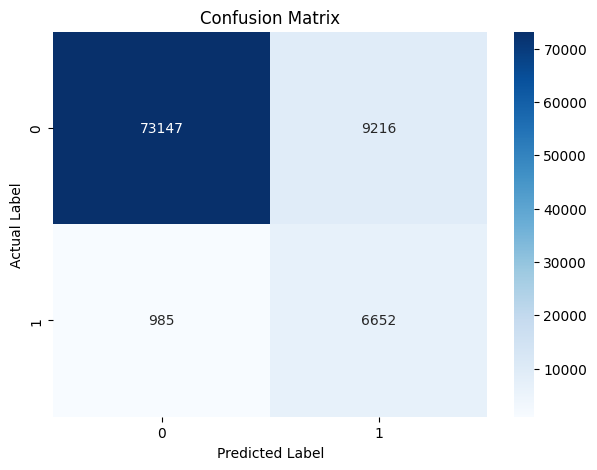

In [ ]:
cm = confusion_matrix(y_train, y_train_pred)
cm_df = pd.DataFrame(cm, index = [i for i in "01"], columns = [i for i in "01"])
plt.figure(figsize=(7,5))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Accuracy for predicting the diabetes label on the training set: (6652/7637) * 100 = 87%

In [ ]:
X_val = val_df[X]
y_val = val_df[y]

In [ ]:
X_test = test_df[X]
y_test = test_df[y]

In [ ]:
y_proba = model.predict_proba(X_val)[:, 1]
y_pred_threshold_val = (y_proba > 0.3).astype(int)

In [ ]:
y_proba = model.predict_proba(X_test)[:, 1]
y_pred_threshold_test = (y_proba > 0.3).astype(int)

In [ ]:
accuracy = accuracy_score(y_val, y_pred_threshold_val)
print(accuracy)

0.8224


In [ ]:
accuracy = accuracy_score(y_test, y_pred_threshold_test)
print(accuracy)

0.804


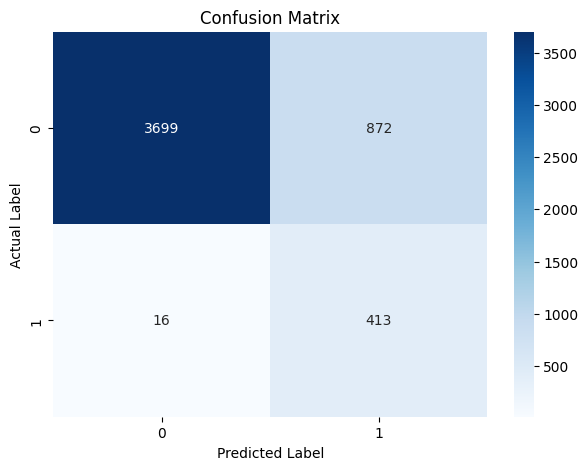

In [ ]:
cm = confusion_matrix(y_val, y_pred_threshold_val)
cm_df = pd.DataFrame(cm, index = [i for i in "01"], columns = [i for i in "01"])
plt.figure(figsize=(7,5))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Accuracy for predicting the diabetes label on the validation set: 413/429 = 96.3%

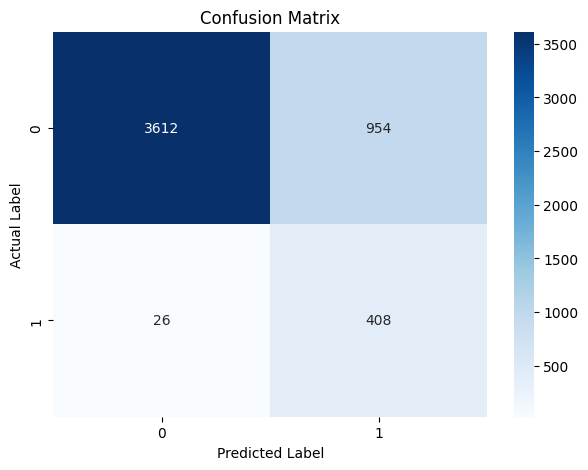

In [ ]:
cm = confusion_matrix(y_test, y_pred_threshold_test)
cm_df = pd.DataFrame(cm, index = [i for i in "01"], columns = [i for i in "01"])
plt.figure(figsize=(7,5))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

The accuracy for predicting the diabetes label on test set is approximately 94%.

(408/434) * 100 = 94%